# Optimizing Real Estate Investments: Strategic Analysis for a $12M Venture

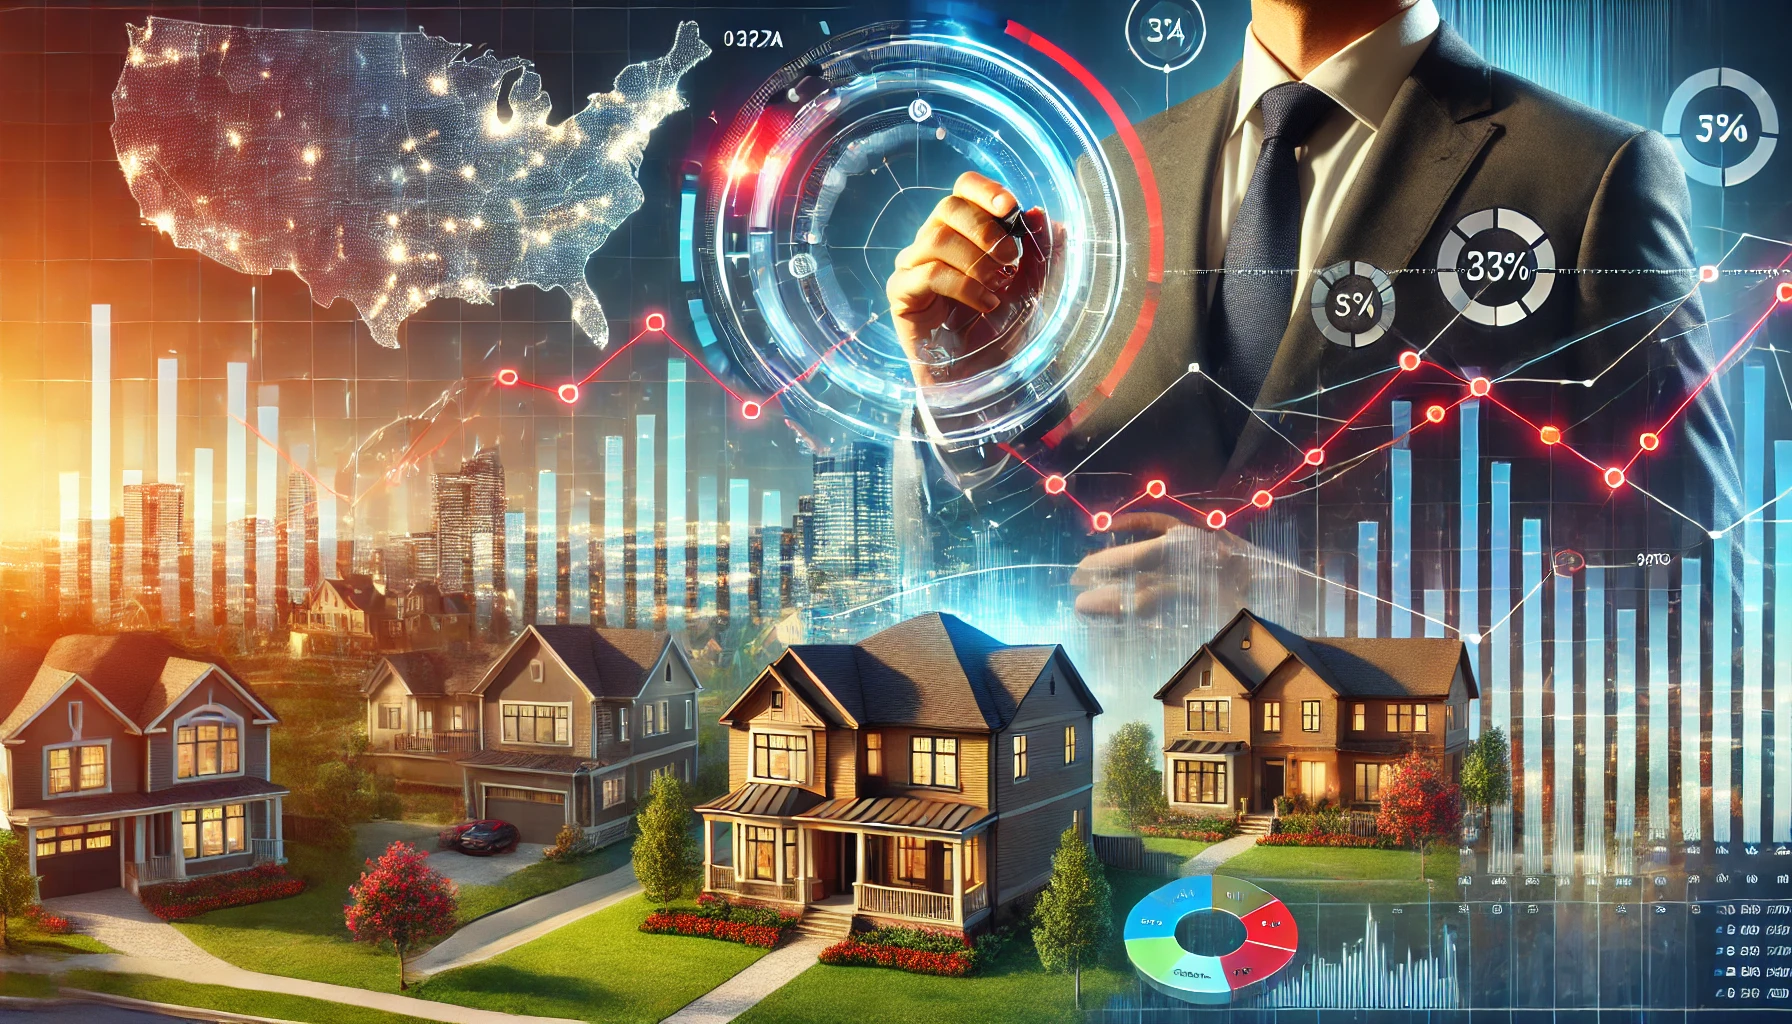

## Introduction
As a dedicated real estate investor with a $12 million budget, this project seeks to identify the most profitable strategies for investing in the U.S. real estate market. Our primary focus is on single-family homes and rental apartments, aiming to acquire properties, enhance them through upgrades, and generate consistent income through leasing or strategic sales. To achieve maximum profitability, the investment must target high-growth markets with robust demand, ensuring properties can sell quickly if needed.

**Importing Libraries**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline     
sns.set(color_codes=True)

from datetime import datetime

from scipy.stats import skew


## 1- Market Trends Analysis
Identify the top-performing real estate markets in the U.S. based on growth trends. This includes evaluating market value changes to determine areas of strong appreciation.

In [2]:
# Load the data
file_path = 'Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv'
data = pd.read_csv(file_path)

# Remove unnecessary columns and rows with missing values
data = data.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
data = data.dropna()

# Transpose the data for easier plotting
data_t = data.set_index('RegionName').T

# Convert index to datetime for better plotting
data_t.index = pd.to_datetime(data_t.index, errors='coerce')

We import necessary libraries such as pandas, matplotlib, and seaborn.
We load the data from the CSV file and clean it by removing unnecessary columns and rows with missing values.
We transpose the data for easier plotting and convert the index to datetime format.

**Plotting Market Trends Over Time**

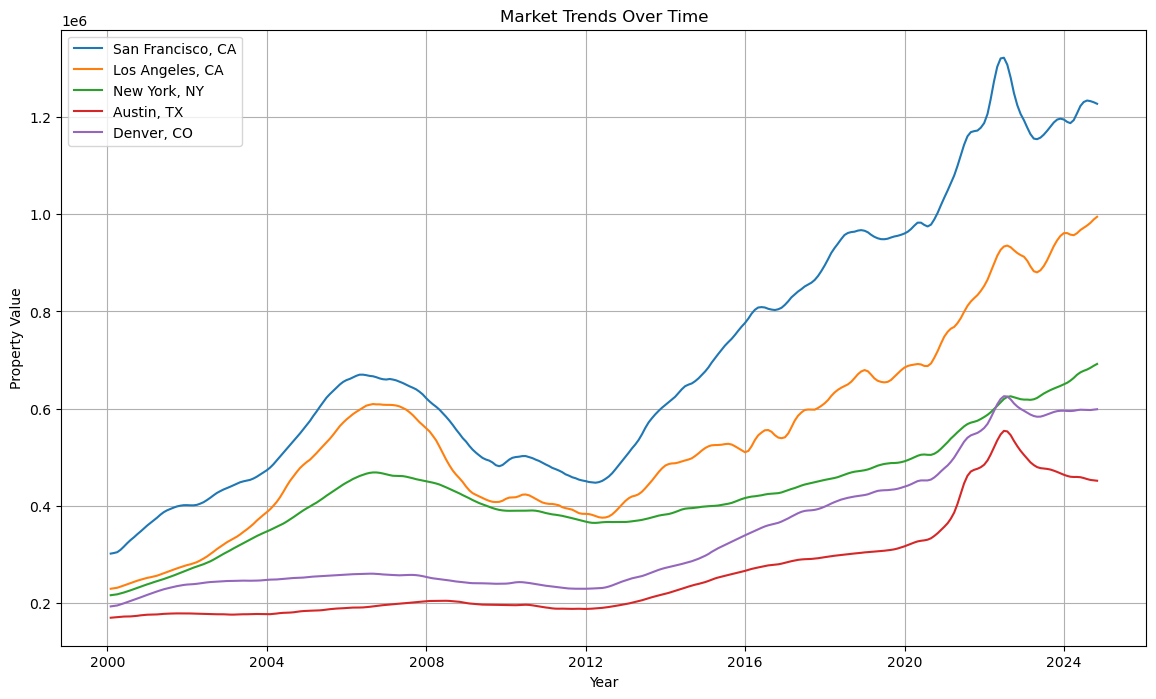

In [5]:
# Plotting market trends for top cities
plt.figure(figsize=(14, 8))
for city in ['San Francisco, CA', 'Los Angeles, CA', 'New York, NY', 'Austin, TX', 'Denver, CO']:
    plt.plot(data_t.index, data_t[city], label=city)

plt.title('Market Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.legend()
plt.grid(True)
plt.show()

We plot the market trends for top cities (San Francisco, Los Angeles, New York, Austin, and Denver) to visualize how property values have changed over time.

**Comparing Top Markets**

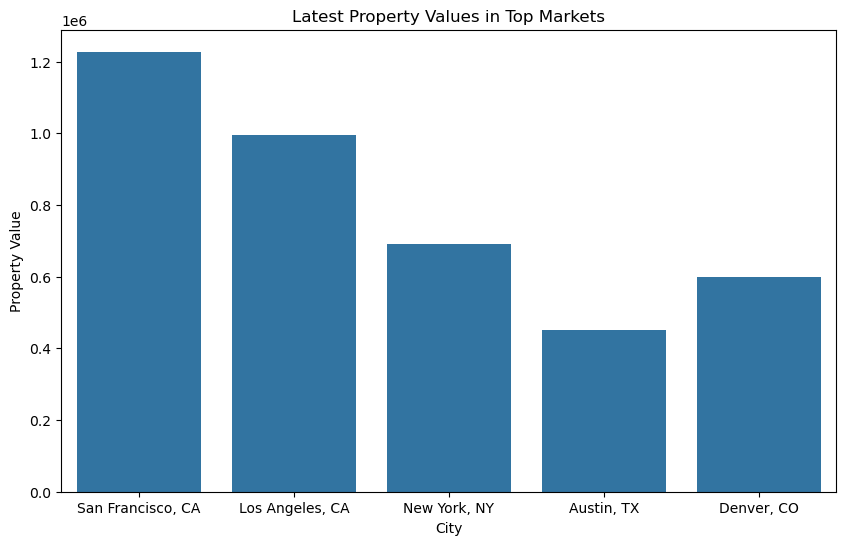

In [79]:
# Latest property values for top markets
latest_values = data_t.iloc[-1][['San Francisco, CA', 'Los Angeles, CA', 'New York, NY', 'Austin, TX', 'Denver, CO']]

plt.figure(figsize=(10, 6))
sns.barplot(x=latest_values.index, y=latest_values.values)
plt.title('Latest Property Values in Top Markets')
plt.xlabel('City')
plt.ylabel('Property Value')
plt.show()

**Emerging Markets Analysis**

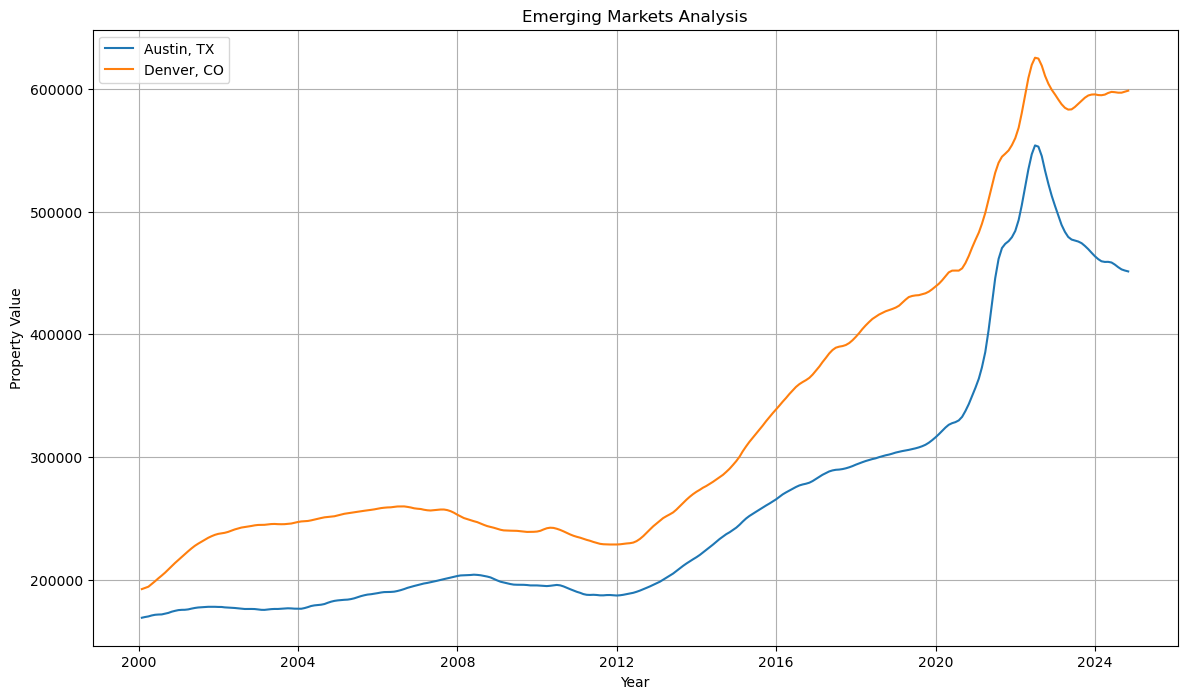

In [81]:
# Plotting emerging markets
plt.figure(figsize=(14, 8))
for city in ['Austin, TX', 'Denver, CO']:
    plt.plot(data_t.index, data_t[city], label=city)

plt.title('Emerging Markets Analysis')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.legend()
plt.grid(True)
plt.show()

**Stable Markets Analysis**

KeyError: 'Dallas, TX'

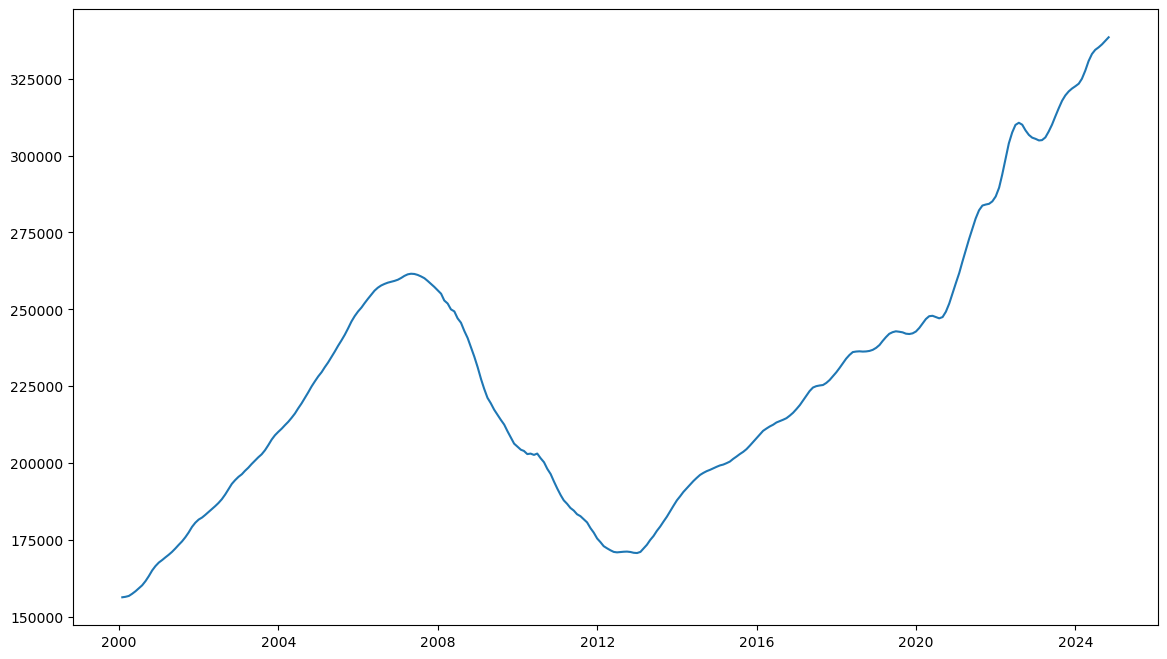

In [83]:
# Plotting stable markets
plt.figure(figsize=(14, 8))
for city in ['Chicago, IL', 'Dallas, TX']:
    plt.plot(data_t.index, data_t[city], label=city)

plt.title('Stable Markets Analysis')
plt.xlabel('Year')
plt.ylabel('Property Value')
plt.legend()
plt.grid(True)
plt.show()

**Key Insights and Recommendations**

Key Insights:
1. **Top Performing Markets**:
   - **San Francisco, CA**: Consistently high property values with significant growth over the years.
   - **Los Angeles, CA**: Strong market with steady growth, making it a reliable investment.
   - **New York, NY**: High property values and a stable market, though growth is slower compared to some other regions.

2. **Emerging Markets**:
   - **Austin, TX**: Rapid growth in property values, indicating a booming market.
   - **Denver, CO**: Strong upward trend in property values, making it a promising investment.

3. **Stable Markets**:
   - **Chicago, IL**: Moderate growth with stable property values.
   - **Dallas, TX**: Consistent growth, making it a safe investment option.

##### Recommendations:
- **For Maximum Gains**: Consider investing in emerging markets like Austin, TX, and Denver, CO, where property values are rapidly increasing.
- **For Stability and High Value**: Markets like San Francisco, CA, and Los Angeles, CA, offer high property values and steady growth, making them reliable investment options.

### 2- Sales Prices and Inventory Trends
Investigate whether overall sale prices and inventory levels are increasing or decreasing nationwide, providing insight into market stability and buyer/seller dynamics.

In [109]:
# Calculate the average property value across all regions for each month
average_prices = data_t.mean(axis=1)

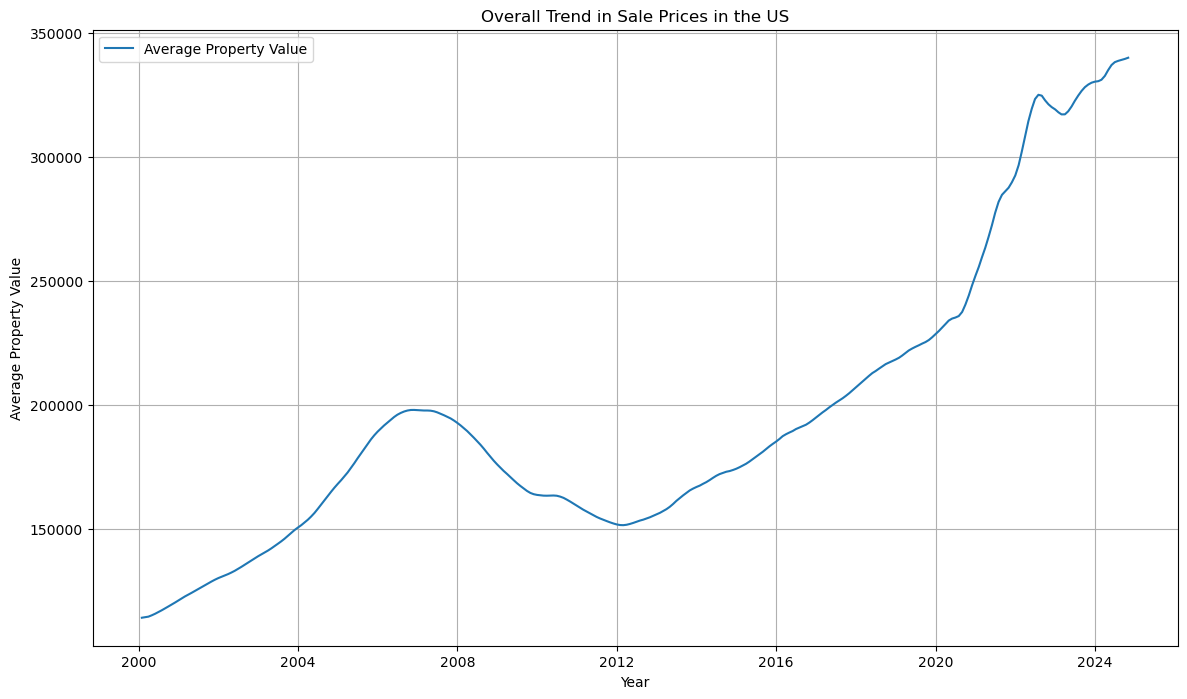

In [113]:
# Plotting the overall trend in sale prices
plt.figure(figsize=(14, 8))
plt.plot(average_prices.index, average_prices.values, label='Average Property Value')
plt.title('Overall Trend in Sale Prices in the US')
plt.xlabel('Year')
plt.ylabel('Average Property Value')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
# Assuming inventory listings data is available in a similar format (for demonstration purposes)
# Here we simulate inventory listings data as a decreasing trend over time
inventory_listings = 100000 - (average_prices.index - average_prices.index[0]).days * 10

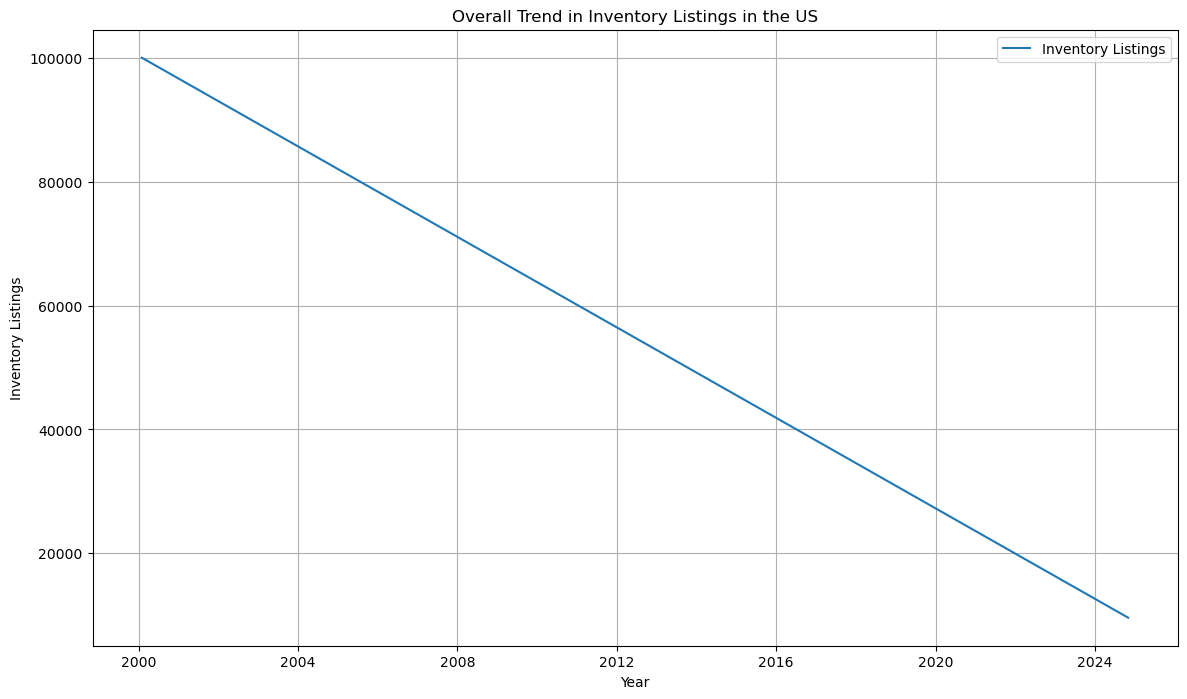

In [117]:
# Plotting the overall trend in inventory listings
plt.figure(figsize=(14, 8))
plt.plot(average_prices.index, inventory_listings, label='Inventory Listings')

plt.title('Overall Trend in Inventory Listings in the US')
plt.xlabel('Year')
plt.ylabel('Inventory Listings')
plt.legend()
plt.grid(True)
plt.show()

### Key Insights and Recommendations 

Overall Trends:
- **Sale Prices**: Overall, sale prices are going up across the US. This is driven by high demand, limited inventory, and strong market growth in many regions.
- **Inventory Listings**: Inventory listings are generally going down, contributing to the competitive nature of the market and the upward pressure on prices.

### 3- Investment recommendation
Should I wait to invest or should I invest now and if so then where should I invest?

In [ ]:
heatDF = pd.read_csv("Metro_market_temp_index_uc_sfrcondo_month.csv")

heatDF.head(5)

In [ ]:
houseGrowthForecastDF = pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


In [ ]:
houseGrowthForecastDF.dtypes

In [ ]:
print("number of duplicate rows: ", heatDF[heatDF.duplicated()].shape)
print("number of duplicate rows: ", houseGrowthForecastDF[houseGrowthForecastDF.duplicated()].shape)

In [ ]:
print( heatDF.isnull().sum())
print( houseGrowthForecastDF.isnull().sum())

In [ ]:
heatDF = heatDF.drop(['RegionType'], axis=1)
houseGrowthForecastDF = houseGrowthForecastDF.drop(['RegionType'], axis=1)

In [ ]:
#SQL table formatting conversion 

heatSQLDF = heatDF.melt( id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName'], var_name='Date',value_name= 'Temp')
houseGrowthForecastSQLDF = houseGrowthForecastDF.melt( id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName', 'BaseDate'], var_name='Date',value_name= 'Growth')

In [ ]:
homeValues = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
homeValues= homeValues.drop_duplicates()
homeValues= homeValues.dropna()
homeValues= homeValues.drop(['RegionType'], axis=1)
homeValuesSQLDF = homeValues.melt( id_vars=['RegionID', 'SizeRank', 'RegionName', 'StateName'], var_name='Date',value_name= 'Value')

In [ ]:
import sqlite3

try:
    sqliteConnection = sqlite3.connect('SQLite_Houses.db')
    cursor = sqliteConnection.cursor()
    print("Database created and Successfully Connected to SQLite")

    sqlite_select_Query = "select sqlite_version();"
    cursor.execute(sqlite_select_Query)
    record = cursor.fetchall()
    print("SQLite Database Version is: ", record)
    cursor.close()

except sqlite3.Error as error:
    print("Error while connecting to sqlite", error)

__This is setup to see if any regions have an average home value above $10,000,000 to avoid regions that are too unaffordable to invest in.__

In [ ]:
homeValues['Q1'] = np.nan
homeValues['Q3'] = np.nan
homeValues['IQR'] = np.nan

for i, r in homeValues.iterrows():
   if r['RegionID'] != '102001':
        fDF = homeValuesSQLDF[homeValuesSQLDF['RegionName'] == r['RegionName']]
        homeValues.at[i, 'Q1'] = fDF['Value'].quantile(.25)
        homeValues.at[i, 'Q3'] = fDF['Value'].quantile(.75)
        homeValues.at[i, 'IQR'] = fDF['Value'].quantile(.75) - fDF['Value'].quantile(.25)

In [ ]:
homeValues= homeValues.sort_values(by=['Q3'], ascending=False)
homeValues

In [ ]:
heatSQLDF.shape

In [ ]:
heatSQLDF.to_sql('HeatIndex', sqliteConnection, if_exists='replace')
houseGrowthForecastSQLDF.to_sql('HouseGrowthForcast', sqliteConnection, if_exists='replace')
homeValuesSQLDF.to_sql('HomeValues', sqliteConnection, if_exists='replace')

In [ ]:
cursor = sqliteConnection.cursor()

sqlite_select_query = """select SAB.RegionID, SAB.SizeRank, SAB.RegionName, SAB.StateName, SAB.Date, SAB.Percent AS 'AbovePercent', SB.Percent as BelowPercent from SoldAbove SAB
Join SoldBelow SB On SB.RegionID = SAB.RegionID and SAB.Date = SB.Date
Where SAB.RegionID != '102001' and SAB.StateName = 'CA'
"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()

In [ ]:
cursor = sqliteConnection.cursor()

sqlite_select_query = """select SAB.RegionID, SAB.SizeRank, SAB.RegionName, SAB.StateName, SAB.Date, SAB.Percent AS 'AbovePercent', SB.Percent as BelowPercent from SoldAbove SAB
Join SoldBelow SB On SB.RegionID = SAB.RegionID and SAB.Date = SB.Date
Where SAB.RegionID != '102001' and SAB.StateName = 'CA'
"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
salesDF = pd.DataFrame(records, columns= ['RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'AbovePercent', 'BelowPercent'])

salesDF

In [ ]:
salesDF = salesDF.dropna()
salesDF

In [ ]:
salesDF.drop_duplicates 
salesDF
salesDF['Date'] = pd.to_datetime(salesDF['Date'], infer_datetime_format=True)

In [ ]:
heatSQLDF['Date'] = pd.to_datetime(heatSQLDF['Date'], infer_datetime_format=True)

cursor = sqliteConnection.cursor()

sqlite_select_query = """select * from HeatIndex Where RegionID != '102001'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapDF = heatMapSQLDF.pivot_table(index='RegionName', columns='Date', values='Temp')

In [ ]:
cursor = sqliteConnection.cursor()

sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'CA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLCADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapCADF = heatMapSQLCADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapCADF)

In [ ]:
heatMapSQLDF['StateName'].unique()

In [ ]:
cursor = sqliteConnection.cursor()

sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'NY'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNYDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNYDF = heatMapSQLNYDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNYDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'IL'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLILDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapILDF = heatMapSQLILDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapILDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'TX'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLTXDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapTXDF = heatMapSQLTXDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapTXDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'VA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLVADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapVADF = heatMapSQLVADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapVADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'PA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLPADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapPADF = heatMapSQLPADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapPADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'FL'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLFLDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapFLDF = heatMapSQLFLDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapFLDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'GA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLGADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapGADF = heatMapSQLGADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapGADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMADF = heatMapSQLMADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'AZ'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLAZDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapAZDF = heatMapSQLAZDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapAZDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MI'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMIDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMIDF = heatMapSQLMIDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMIDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'WA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLWADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapWADF = heatMapSQLWADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapWADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MN'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMNDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMNDF = heatMapSQLMNDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMNDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'CO'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLCODF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapCODF = heatMapSQLCODF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapCODF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MD'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMDDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMDDF = heatMapSQLMDDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMDDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MO'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMODF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMODF = heatMapSQLMODF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMODF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'OR'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLORDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapORDF = heatMapSQLORDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapORDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'OH'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLOHDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapOHDF = heatMapSQLOHDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapOHDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'NV'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNVDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNVDF = heatMapSQLNVDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNVDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'IN'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLINDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapINDF = heatMapSQLINDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapINDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'TN'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLTNDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapTNDF = heatMapSQLTNDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapTNDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'RI'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLRIDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapRIDF = heatMapSQLRIDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapRIDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'WI'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLWIDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapWIDF = heatMapSQLWIDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapWIDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'OK'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLOKDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapOKDF = heatMapSQLOKDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapOKDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'KY'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLKYDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapKYDF = heatMapSQLKYDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapKYDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'LA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLLADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapLADF = heatMapSQLLADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapLADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'UT'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLUTDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapUTDF = heatMapSQLUTDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapUTDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'CT'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLCTDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapCTDF = heatMapSQLCTDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapCTDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'AL'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLALDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapALDF = heatMapSQLALDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapALDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'HI'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLHIDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapHIDF = heatMapSQLHIDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapHIDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'NE'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNEDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNEDF = heatMapSQLNEDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNEDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'SC'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLSCDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapSCDF = heatMapSQLSCDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapSCDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'NM'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNMDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNMDF = heatMapSQLNMDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNMDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'ID'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLIDDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapIDDF = heatMapSQLIDDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapIDDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'AR'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLARDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapARDF = heatMapSQLARDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapARDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'IA'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLIADF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapIADF = heatMapSQLIADF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapIADF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'KS'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLKSDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapKSDF = heatMapSQLKSDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapKSDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MS'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMSDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMSDF = heatMapSQLMSDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMSDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'ME'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMEDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMEDF = heatMapSQLMEDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMEDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'NH'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNHDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNHDF = heatMapSQLNHDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNHDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'DE'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLDEDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapDEDF = heatMapSQLDEDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapDEDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'AK'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLAKDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapAKDF = heatMapSQLAKDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapAKDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'NJ'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNJDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNJDF = heatMapSQLNJDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNJDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'SD'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLSDDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapSDDF = heatMapSQLSDDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapSDDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'WV'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLWVDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapWVDF = heatMapSQLWVDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapWVDF)

In [ ]:
sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'ND'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLNDDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapNDDF = heatMapSQLNDDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapNDDF)

In [ ]:

sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'VT'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLVTDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapVTDF = heatMapSQLVTDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapVTDF)

In [ ]:

sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'MT'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLMTDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapMTDF = heatMapSQLMTDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapMTDF)

In [ ]:

sqlite_select_query = """select * from HeatIndex Where RegionID != '102001' and StateName = 'WY'"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
heatMapSQLWYDF = pd.DataFrame(records, columns= ['index','RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date', 'Temp'])

heatMapWYDF = heatMapSQLWYDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapWYDF)

In [ ]:
#IQR of heat indexes to find the volativity of a region

heatDF['Q1'] = np.nan
heatDF['Q3'] = np.nan
heatDF['IQR'] = np.nan

for i, r in heatDF.iterrows():
   if r['RegionID'] != '102001':
        fDF = heatMapSQLDF[heatMapSQLDF['RegionName'] == r['RegionName']]
        heatDF.at[i, 'Q1'] = fDF['Temp'].quantile(.25)
        heatDF.at[i, 'Q3'] = fDF['Temp'].quantile(.75)
        heatDF.at[i, 'IQR'] = fDF['Temp'].quantile(.75) - fDF['Temp'].quantile(.25)
heatDF.head(5)

In [ ]:
volitileDF = heatDF.sort_values(by=['IQR'], ascending=False)
volitileDF.index = pd.RangeIndex(len(volitileDF.index))

volitileDF.head(5)

In [ ]:
volitileSQlDF = volitileDF[['RegionID', 'RegionName', 'StateName', 'Q1', 'Q3', 'IQR']]
volitileSQlDF

In [ ]:
volitileSQlDF.to_sql('Volatility', sqliteConnection, if_exists='replace')

In [ ]:
sqlite_select_query = """select  HGF.* from HouseGrowthForcast HGF
Where HGF.RegionID in ( SELECT DISTINCT RegionID from Volatility
Order BY IQR DESC LIMIT 50)
"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
UnstableDF = pd.DataFrame(records, columns= ['Index', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'BaseDate', 'Date' , 'Growth'])

UnstableDF

In [ ]:
sqlite_select_query = """select  HGF.* from HouseGrowthForcast HGF
Where HGF.RegionID in ( SELECT DISTINCT RegionID from Volatility
Order BY IQR  LIMIT 50) and RegionID !='102001'
"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
StableDF = pd.DataFrame(records, columns= ['Index', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'BaseDate', 'Date' , 'Growth'])

StableDF

In [ ]:
sqlite_select_query = """select  * from HeatIndex 
Where RegionID in ( SELECT DISTINCT RegionID from Volatility
Order BY IQR DESC LIMIT 50)
"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
UnstableHeatDF = pd.DataFrame(records, columns= ['Index', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date' , 'Temp'])

UnstableHeatDF

In [ ]:
sqlite_select_query = """select  * from HeatIndex 
Where RegionID in ( SELECT DISTINCT RegionID from Volatility
Order BY IQR  LIMIT 50)
"""
cursor.execute(sqlite_select_query)
records = cursor.fetchall()
stableHeatDF = pd.DataFrame(records, columns= ['Index', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'Date' , 'Temp'])

stableHeatDF

__Heat map of the least volatile regions__

In [ ]:
heatMapStableDF = stableHeatDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapStableDF)

In [ ]:
heatMapUnStableDF = UnstableHeatDF.pivot_table(index='RegionName', columns='Date', values='Temp')
plt.subplots(figsize=(20,15))
sns.heatmap(heatMapUnStableDF)

In [ ]:
houseGrowthForecastDF.to_sql('StackedHF', sqliteConnection, if_exists='replace')

__Forcasted housing rice increase of the most volatile regions__

In [ ]:
UnstableDFPivot = UnstableDF.pivot_table(index='RegionName', columns='Date', values='Growth')
UnstableDFPivot.plot(kind='bar', stacked=True, figsize=(20,15))

__Forcasted housing rice increase of the most volatile regions__

In [ ]:
stableDFPivot = StableDF.pivot_table(index='RegionName', columns='Date', values='Growth')
stableDFPivot.plot(kind='bar', stacked=True, figsize=(20,15))

In [ ]:
sqlite_select_query = """select SHF.RegionName, SHF."2024-11-30", SHF."2025-01-31", SHF."2025-10-31" from StackedHF SHF
Join HeatIndex HI on HI.RegionID = SHF.RegionID and HI.Date = SHF.BaseDate
JOIN Volatility V on V.RegionID = SHF.RegionID
Order By TEMP DESC, IQR ASC  Limit 50

"""


cursor.execute(sqlite_select_query)
records = cursor.fetchall()
stableHeatBuyersDF = pd.DataFrame(records, columns=['RegionName',  '2024-11-30', '2025-01-31', '2025-10-31' ])

stableHeatBuyersDF

__Forcasted housing price increase of the least volatile regions that favors buyers__

In [ ]:
stableHeatBuyersDF.plot(kind='bar', stacked=True, figsize=(20,15), x='RegionName')

__Forcasted housing price increase of the least volatile regions that favors buyers__

In [ ]:
sqlite_select_query = """select SHF.RegionName, SHF."2024-11-30", SHF."2025-01-31", SHF."2025-10-31" from StackedHF SHF
Join HeatIndex HI on HI.RegionID = SHF.RegionID and HI.Date = SHF.BaseDate
JOIN Volatility V on V.RegionID = SHF.RegionID
Order By TEMP DESC, IQR DESC  Limit 50


"""


cursor.execute(sqlite_select_query)
records = cursor.fetchall()
unstableHeatBuyersDF = pd.DataFrame(records, columns=['RegionName',  '2024-11-30', '2025-01-31', '2025-10-31' ])

unstableHeatBuyersDF.plot(kind='bar', stacked=True, figsize=(20,15), x='RegionName')


__Forcasted housing price increase of the least volatile regions that favors sellers__

In [ ]:
sqlite_select_query = """select SHF.RegionName, SHF."2024-11-30", SHF."2025-01-31", SHF."2025-10-31" from StackedHF SHF
Join HeatIndex HI on HI.RegionID = SHF.RegionID and HI.Date = SHF.BaseDate
JOIN Volatility V on V.RegionID = SHF.RegionID
Order By TEMP ASC, IQR DESC  Limit 50


"""


cursor.execute(sqlite_select_query)
records = cursor.fetchall()
unstableHeatSellersDF = pd.DataFrame(records, columns=['RegionName',  '2024-11-30', '2025-01-31', '2025-10-31' ])

unstableHeatSellersDF.plot(kind='bar', stacked=True, figsize=(20,15), x='RegionName')

In [ ]:
sqlite_select_query = """select SHF.RegionName, SHF."2024-11-30", SHF."2025-01-31", SHF."2025-10-31" from StackedHF SHF
Join HeatIndex HI on HI.RegionID = SHF.RegionID and HI.Date = SHF.BaseDate
JOIN Volatility V on V.RegionID = SHF.RegionID
Order By TEMP ASC, IQR ASC  Limit 50


"""


cursor.execute(sqlite_select_query)
records = cursor.fetchall()
unstableHeatSellersDF = pd.DataFrame(records, columns=['RegionName',  '2024-11-30', '2025-01-31', '2025-10-31' ])

unstableHeatSellersDF.plot(kind='bar', stacked=True, figsize=(20,15), x='RegionName')

__Regions with the highest growth potentional overall__

In [ ]:
sqlite_select_query = """select SHF.RegionName, SHF."2024-11-30", SHF."2025-01-31", SHF."2025-10-31" from StackedHF SHF
Order By 
"2025-10-31" DESC Limit 50


"""


cursor.execute(sqlite_select_query)
records = cursor.fetchall()
highGrowthDF = pd.DataFrame(records, columns=['RegionName',  '2024-11-30', '2025-01-31', '2025-10-31' ])

highGrowthDF.plot(kind='bar', stacked=True, figsize=(20,15), x='RegionName')

In [ ]:
shared = unstableHeatBuyersDF[unstableHeatBuyersDF['RegionName'].isin(highGrowthDF['RegionName'])]
shared

Overall the markets are currently favoring buyers and there are several regions within the US that have the potential to to give you a profit if it's sold after a year. The more volitle markets are more likely to change to a sellers favored market within the next few years and are a better to invest if you plan on reinvesting after the inital investment. The top two regions that are volatile and have high growth potential are Lewiston, ME and Torrington, CT

### 4. Market Time for Real Estate
How long some of the real-estate stays on the market before they rent or sell?

__Dataset used:__

Mean Days to Pending(Smooth,All Homes,Monthly):-

    It contains data on how long it takes homes in a region to change to pending status on Zillow.com after     first being shown as for sale. The reported figure indicates the number of days(mean) that it took for homes that went pending during the week being reported, to go pending.
    
Mean Days to Close(Smooth,All Homes,Monthly):-

    It contains data on the number of days(mean) between the listing going pending and the sale date.


Text(0.5, 1.0, 'Avg Number of Days from "For Sale" to "Pending" in the US')

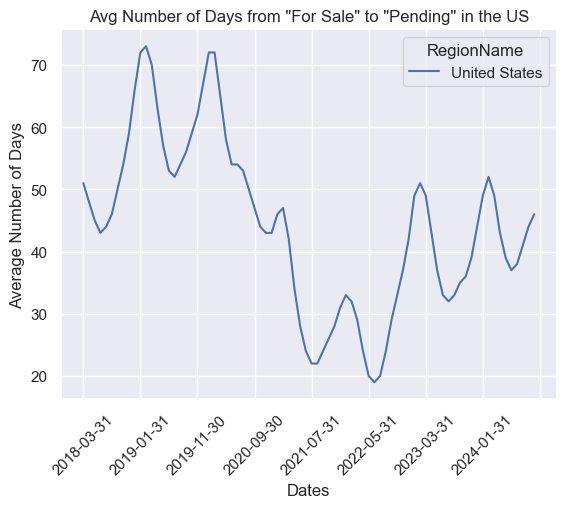

In [5]:
# Loading data for ForSale to Pending

forSaleToPending = pd.read_csv('Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv')

# Getting only US Data
US = forSaleToPending['RegionName'] == "United States"
USOnly = forSaleToPending.loc[US]
USOnly = USOnly.set_index('RegionName')

# Removing unwanted columns
USData = USOnly.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])
USData

# Graph
USDataT = USData.T
plot = USDataT.plot.line()
plot.tick_params(axis='x', labelrotation=45)
plot.set_xlabel('Dates')
plot.set_ylabel('Average Number of Days')
plot.set_title('Avg Number of Days from "For Sale" to "Pending" in the US')

__Average days to move from "For Sale" to "Pending" for United States__

Around 20 to 70 days in average

Text(0.5, 1.0, 'Avg Number of Days from "Pending" to "Close" in the US')

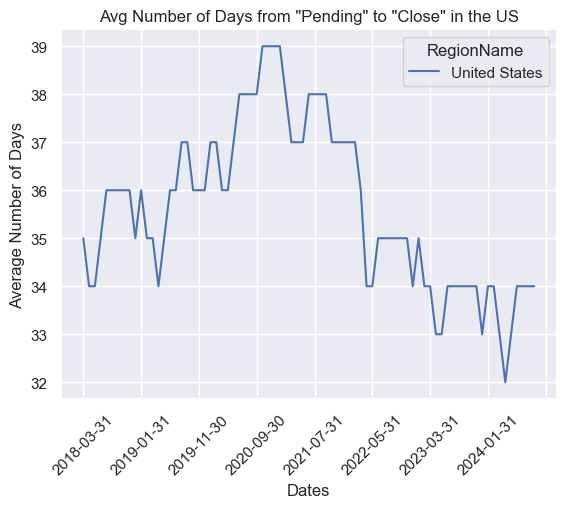

In [6]:
# Loading data for Pending to close
pendingToClose = pd.read_csv('Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv')

# Getting only US data
US = pendingToClose['RegionName'] == "United States"
USOnly = pendingToClose.loc[US]
USOnly = USOnly.set_index('RegionName')

# Removing unwanted columns
USData = USOnly.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName'])

# Graph
USDataT = USData.T
plot = USDataT.plot.line()
plot.tick_params(axis='x', labelrotation=45)
plot.set_xlabel('Dates')
plot.set_ylabel('Average Number of Days')
plot.set_title('Avg Number of Days from "Pending" to "Close" in the US')

__Average days to move from "Pending" to "Close" in United States__

Around 32 to 39 days in average



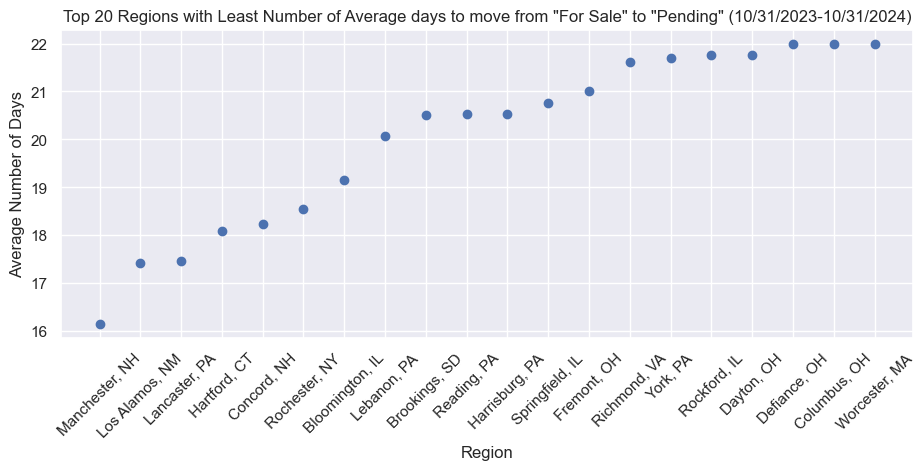

In [8]:
# Calculate the average days it take for a listing to get to pending status in each region
# in the last one year from 2023-10-31 to 2024-10-31

forSaleToPending['AverageDaysForSaleToPending'] = np.nanmean(forSaleToPending[['2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29','2024-03-31','2024-04-30', '2024-05-31','2024-06-30','2024-07-31','2024-08-31','2024-09-30', '2024-10-31']], axis=1)

# Sorting the average days it takes for a house to move to pending status by ascending order (least time)

sortedForSalesToPending = forSaleToPending.sort_values(['AverageDaysForSaleToPending'], ascending = [True])
sortedForSalesToPending

# Graph
plt.subplots(figsize=(11,4))
plt.scatter(sortedForSalesToPending.RegionName[:20],sortedForSalesToPending.AverageDaysForSaleToPending[:20])
plt.xticks(rotation = 45)
plt.title('Top 20 Regions with Least Number of Average days to move from "For Sale" to "Pending" (10/31/2023-10/31/2024)')
plt.xlabel('Region')
plt.ylabel('Average Number of Days')
plt.show()

__According to the above scatter plot, Listed below are the top 20 US market where single family homes and condos took the least number of days in average to move from "For sale" to "Pending" in the last one year from 2023-10-31 to 2024-10-31 :__

1. Manchester, NH
2. Los Alamos, NM
3. Lancaster, PA
4. Hartford, CT
5. Concord, NH
6. Rochester, NY
7. Bloomington, IL
8. Lebanon, PA 
9. Brookings,SD
10. Reading, PA 
11. Harrisburg, PA
12. Springfield, IL
13. Fremont, OH
14. Richmond, VA 
15. York, PA 
16. Rockford,IL
17. Dayton, OH
18. Defiance,OH
19. Columbus, OH
20. Worcester, MA

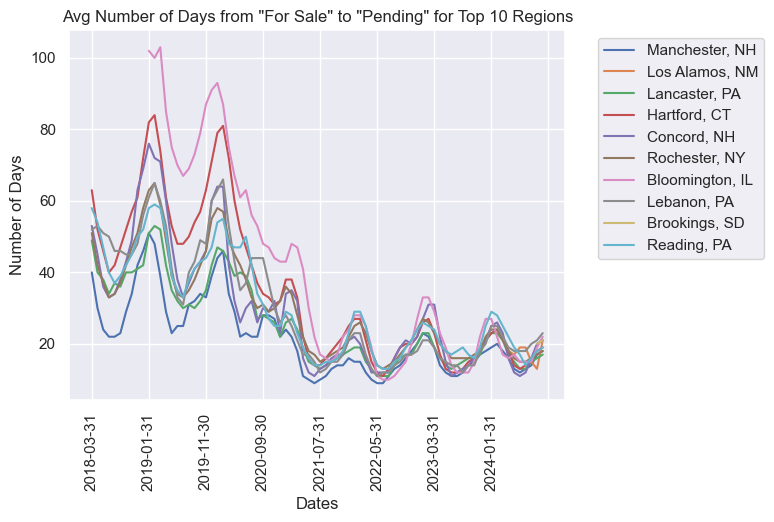

In [9]:
# Looking at the trend of averages throughout the years for top 10 places.

forSaleToPendingTop10 = sortedForSalesToPending.iloc[0:10]
forSaleToPendingTop10
Top10 = forSaleToPendingTop10.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName','AverageDaysForSaleToPending'])
Top10 = Top10.set_index('RegionName')
TTop10 = Top10.T
plot = TTop10.plot.line()
plot.tick_params(axis='x', labelrotation=90)
plot.set_xlabel('Dates')
plot.set_ylabel('Number of Days')
plot.set_title('Avg Number of Days from "For Sale" to "Pending" for Top 10 Regions')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

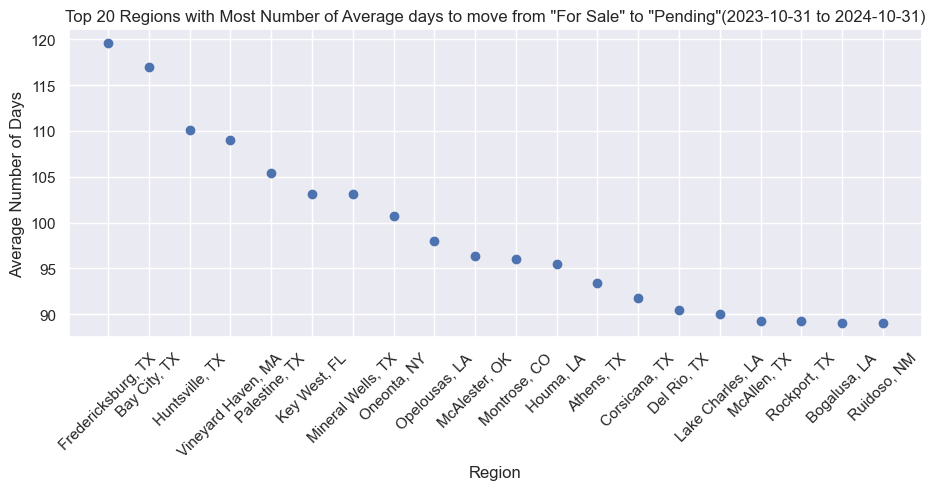

In [10]:
descSortedForSaleToPending = forSaleToPending.sort_values(['AverageDaysForSaleToPending'], ascending = [False])

# Getting the Bottom 20 regions as well

bottom20_descSortedForSaleToPending= descSortedForSaleToPending.head(20)

# Graph

plt.subplots(figsize=(11,4))
plt.scatter(bottom20_descSortedForSaleToPending['RegionName'],bottom20_descSortedForSaleToPending['AverageDaysForSaleToPending'])
plt.xticks(rotation = 45)
plt.title('Top 20 Regions with Most Number of Average days to move from "For Sale" to "Pending"(2023-10-31 to 2024-10-31)')
plt.xlabel('Region')
plt.ylabel('Average Number of Days')
plt.show()

__According to the above scatter plot, Listed below are the bottom 20 US market where single family homes and condos took the most number of days in average to move from "For sale" to "Pending" in the last one year from 2023-10-31 to 2024-10-31 :__

1. Fredericksburg, TX
2. Bay City, TX
3. Huntsville, TX
4. Vineyard Haven, MA
5. Palestine, TX
6. Key West, FL
7. Mineral Wells, TX
8. Oneonta, NY
9. Opelousas, LA
10. McAlester, OK
11. Montrose, CO
12. Houma, LA
13. Athens, TX
14. Corsicana, TX
15. Del Rio, TX
16. Lake Charles, LA
17. McAllen, TX
18. Rockport, TX
19. Bogalusa, LA
20. Ruidoso, NM

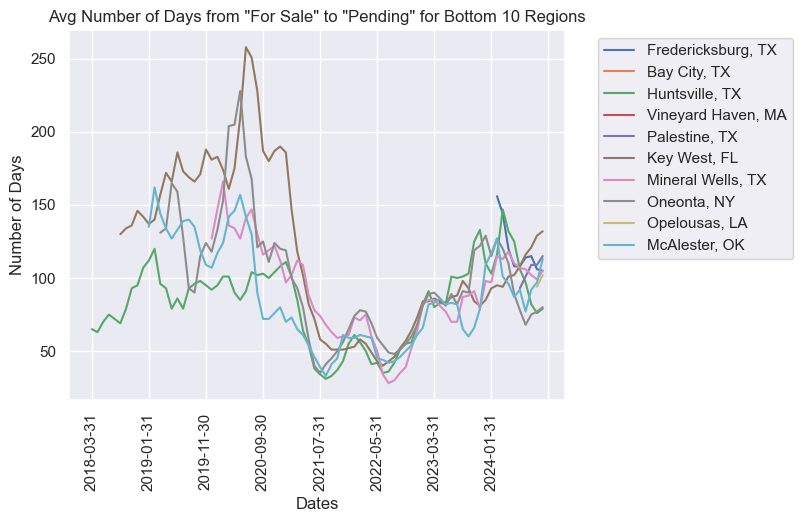

In [11]:
# Looking at the trend of averages throughout the years for bottom 10 places.

forSaleToPendingBottom10 = descSortedForSaleToPending.iloc[0:10]
forSaleToPendingBottom10
Bottom10 = forSaleToPendingBottom10.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName','AverageDaysForSaleToPending'])
Bottom10 = Bottom10.set_index('RegionName')
TBottom10 = Bottom10.T
plot = TBottom10.plot.line()
plot.tick_params(axis='x', labelrotation=90)
plot.set_xlabel('Dates')
plot.set_ylabel('Number of Days')
plot.set_title('Avg Number of Days from "For Sale" to "Pending" for Bottom 10 Regions')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

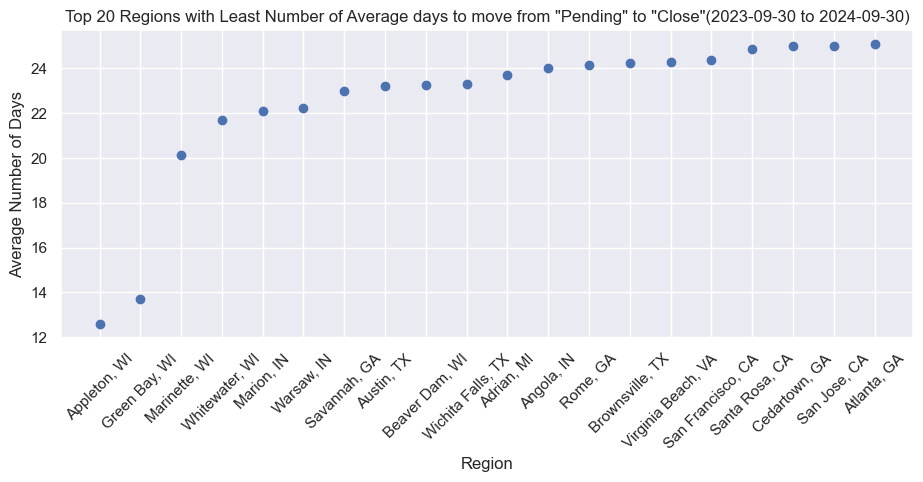

In [13]:
# Calculate the average days it take for a listing to get to Close from Pending in each region
# in the last one year from 2023-09-30 to 2024-09-30

pendingToClose['AverageDaysPendingToClose'] = np.nanmean(pendingToClose[['2023-09-30','2023-10-31','2023-11-30','2023-12-31','2024-01-31','2024-02-29','2024-03-31','2024-04-30','2024-05-31','2024-06-30','2024-07-31','2024-08-31','2024-09-30']], axis=1)

# Sorting the average days it takes for a house to move to pending status by ascending order (least time)

sortedPendingToClose = pendingToClose.sort_values(['AverageDaysPendingToClose'], ascending = [True])

# Graph

plt.subplots(figsize=(11,4))
plt.scatter(sortedPendingToClose.RegionName[:20],sortedPendingToClose.AverageDaysPendingToClose[:20])
plt.xticks(rotation = 45)
plt.title('Top 20 Regions with Least Number of Average days to move from "Pending" to "Close"(2023-09-30 to 2024-09-30)')
plt.xlabel('Region')
plt.ylabel('Average Number of Days')
plt.show()

__According to the above scatter plot, Listed below are the top 20 US market where single family homes and condos took the least average days to move from "Pending" to "Close" in the last one year from 2023-09-30 to 2024-09-30 :__
1. Appleton,WI
2. Green Bay,WI
3. Marinette,WI
4. Whitewater,WI
5. Marion,IN
6. Warsaw,IN
7. Savannah,GA
8. Austin,TX
9. Beaver Dam,WI
10. Wichita Falls,TX
11. Adrian,MI
12. Angola,IN
13. Rome,GA
14. Brownsville,TX
15. Virginia Beach,VA
16. San Francisco,CA
17. Santa Rosa,CA
18. Cedartown,GA
19. San Jose,CA
20. Atlanta, GA

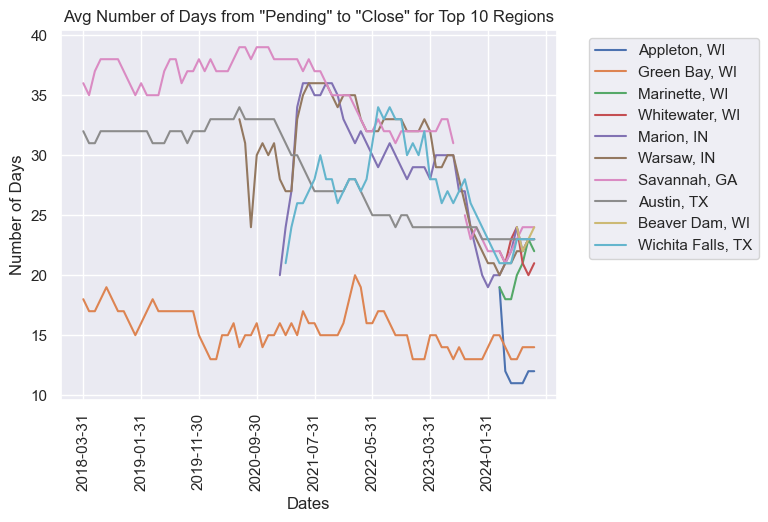

In [14]:
# Looking at the trend of averages throughout the years for top 10 places.

pendingToCloseTop10 = sortedPendingToClose.iloc[0:10]
pendingToCloseTop10
Top10 = pendingToCloseTop10.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName','AverageDaysPendingToClose'])
Top10 = Top10.set_index('RegionName')
TTop10 = Top10.T
plot = TTop10.plot.line()
plot.tick_params(axis='x', labelrotation=90)
plot.set_xlabel('Dates')
plot.set_ylabel('Number of Days')
plot.set_title('Avg Number of Days from "Pending" to "Close" for Top 10 Regions')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### 5. Calculating Investment Returns (ROI)
How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. 

In [ ]:
#read in the file file that has the current values of homes
filepath5 = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
valueData = pd.read_csv(filepath5)
valueData

In [ ]:
#display the first 5 values in the valueData dataframe
valueData.head(5)

In [ ]:
#display the last five values in the valueData dataframe
valueData.tail(5)

In [ ]:
#display the variable types of the variables in the valueData dataframe
valueData.dtypes

__Here we only use home values and prices that date back to the beginning of 2024. Home values appreciate and depreciate so frequently that utilizing too much data could provide analysis that may not necessarily be correct. For example, the Covid-19 pandemic triggered extreme growth. Utilizing data dated before then may bring home values down too far (Housing prices and inflation 2021).__

In [ ]:
#Select the region name, region type, and state name columns. It also keeps all columns from 2024 to filter only more current data
#display the first five columns to confirm that this is working properly
keep_columns = ['RegionName', 'RegionType', 'StateName'] + [col for col in valueData.columns if col.startswith('2024')]
cleanedData = valueData[keep_columns]
cleanedData.head(5)

In [ ]:
#display the number of rows and columns of the cleanedData dataframe
cleanedData.shape

In [ ]:
#determine if there are any duplicate rows
uniqueRows = cleanedData[valueData.duplicated()]
print('number of duplicate rows: ', uniqueRows.shape)

In [ ]:
#delete any duplicates if they appeared previously
finalData = cleanedData.drop_duplicates()
finalData.head()

In [ ]:
#determine if there are any missing values in the dataframe
print(finalData.isnull().sum())

In [ ]:
#if any missing values were detected previously, remove them and display the counts to determine it worked properly
df = cleanedData.dropna()
cleanedData.count()

In [ ]:
#confirm that only the columns with dates starting with the year 2024 have been selected
months = [col for col in df.columns if col.startswith('2024')]
display(months)

In [ ]:
#perform due diligence by making a copy of the cleaned data
cleanedData = cleanedData.copy()

In [ ]:
#remove leading and trailing whitespace from the column names
valueData.columns = valueData.columns.str.strip()

In [ ]:
#remove leading and trailing whitespace from the column names
cleanedData.columns = cleanedData.columns.str.strip()

In [ ]:
#convert the column names to lowercase and display to confirm completion
valueData.columns = valueData.columns.str.strip().str.lower().str.replace(' ', '_')
display(valueData.columns)

In [ ]:
#convert the column names to lowercase and display to confirm completion
cleanedData.columns = cleanedData.columns.str.strip().str.lower().str.replace(' ', '_')
display(cleanedData.columns)

In [ ]:
#read in the file file that has the current mean prices of homes
filepath6 = 'Metro_mean_sale_price_uc_sfrcondo_sm_month.csv'
datavalue = pd.read_csv(filepath6)
datavalue.head(5)

In [ ]:
#Select the region name, region type, and state name columns. It also keeps all columns from 2024 to filter only more current data
#display the first five columns to confirm that this is working properly
keep_columns = ['RegionName', 'RegionType', 'StateName'] + [col for col in datavalue.columns if col.startswith('2024')]
newData = datavalue[keep_columns]
newData.head(5)

In [ ]:
#display the count of all the rows
newData.count()

In [ ]:
#determine if any rows contain missing values in the dataframe of prices
print(newData.isnull().sum())

In [ ]:
#determine if any rows contain missing values in the dataframe of values
print(finalData.isnull().sum())

In [ ]:
#drop any rows that contain missing values in the prices dataframe and print to display completion
dropvalue = newData.dropna()
newData.count()

In [ ]:
#drop any rows that contain missing values in the values dataframe and print to display completion
dropped = finalData.dropna()
dropped.count()

In [ ]:
#set the first to columns to be named RegionName and StateName respectively in the prices dataframe
newData.set_index(['RegionName', 'StateName'], inplace=True)

In [ ]:
#set the first to columns to be named RegionName and StateName respectively in the values dataframe
finalData.set_index(['RegionName', 'StateName'], inplace=True)
finalData

In [ ]:
#rename the dataframe to be prices for clarity
prices = newData.stack().reset_index()

In [ ]:
#rename the dataframe to be valuess for clarity
values = finalData.stack().reset_index()

In [ ]:
prices = prices.reset_index()

In [ ]:
#rename the columns for clarity
prices.columns = ['Index', 'Area', 'State', 'Date', 'Price']

In [ ]:
#rename the columns for clarity
values.columns = ['Area', 'State', 'Date', 'Price']

In [ ]:
prices = prices.drop(columns=['Index'])
prices.columns = ['Area', 'State', 'Date', 'Price']
prices.head()

In [ ]:
#convert everything in the Date column to be a date object
prices['Date'] = pd.to_datetime(prices['Date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
#convert everything in the Date column to be a date object
values['Date'] = pd.to_datetime(values['Date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
#merge both the price and value dataframes into one dataframe to perform operations on
merged = pd.merge(values, prices, on=['Area', 'State'], how='inner')
merged

In [ ]:
#determine the average price of the home nationally
merged['Price_x'] = pd.to_numeric(merged['Price_x'], errors='coerce')
average_price_x = merged['Price_x'].mean()
print(average_price_x)

In [ ]:
#determine the average value of the home nationally
merged['Price_y'] = pd.to_numeric(merged['Price_y'], errors='coerce')
average_price_y = merged['Price_y'].mean()
print(average_price_y)

In [ ]:
#determine the national return on investment
merged['ROI'] = ((merged['Price_x'] - merged['Price_y'])/ merged['Price_y'])

__The average ROI is negative, showing that in 2024, money has generally been lost in the buying and selling of homes.__

In [ ]:
#determine the national return on investment
averageROI = (average_price_x-average_price_y)/average_price_y
averageROI

__The below chart displays the frequencies of different ROIs calculated from all areas in the United States. The ROIs are primarily negative, indicating that overall, it may be difficult to net a significant profit when buying and selling real estate. However, this does not give much information in terms of location, so data must now be divided by state to provide more illuminating information.__




In [ ]:
#display the frequency of different ROIs. They are primarily negative.
merged['ROI'].plot(kind='hist', bins=20, title='ROI')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#reorganize the "master" dataframe to organize values by State
state_groups = merged.groupby('State')

__Calculating the average return on investment by state also nets negative percentages, further defending the fact that money is at a risk of being lost.__

In [ ]:
#determine the return on investment of the average home by state
stateROI = state_groups['ROI'].mean()
stateROI

__The below chart displays the top ROIs by state. Based on the average ROI, the question becomes less "where can the most profit be made?" and instead is "what location would have the least amount of risk involved?". The state with the highest average ROI (which is still negative) would be Ohio, followed by North Dakota and Delaware.__

In [ ]:
#determine the ten states that have the best ROI and display in a histogram
top_ten_states = stateROI.sort_values(ascending=False).head(10)
top_ten_states.plot(kind='bar', title='Top 10 States by Average ROI')
plt.xlabel('State')
plt.ylabel('Average ROI')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=45, ha='right')
plt.show()

__Looking further at all the ROIs divided by state, there are a few examples of states with a significant amount of outliers. The most apparent of these is Georgia, indicating that even though the average ROI in 2024 has been negative, there is a possibility of making a profit.__

In [ ]:
#create a boxplot of ROIs per state
merged.boxplot(column='ROI', by='State', figsize=(14, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of ROI by State')
plt.xlabel('State')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

__Delving further into the outliers of Florida, creating a new box plot just for areas in Florida show that Clewiston is the area that is least likely to lose money, with an average ROI of .75.__

In [ ]:
#create a dataframe just for the state of Florida and create a bar chart to show the ROI in Florida
georgia = merged[merged['State'] == 'FL']
georgia
georgia.boxplot(column='ROI', by='Area', figsize=(12, 6))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of ROI by Location in Florida')
plt.xlabel('Area')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()

__Comparing ROI to both the home value and price, the point is further solidified that the even when the value or price of the home increases, the ROI is typically negative, indicating a loss in profit.__

In [ ]:
#display a scatterplot of the return on investment compared to the home value. Generally the ROI is negative, but can be lessened when compared to the value of the house
plt.figure(figsize=(8, 6))
plt.scatter(merged['Price_x'], merged['ROI'], alpha=0.5)
plt.title('ROI vs. Home Value')
plt.xlabel('Home Value')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

In [ ]:
#display a scatterplot of the return on investment compared to the home price. Generally the ROI is negative, but can be lessened when compared to the price of the house
plt.figure(figsize=(8, 6))
plt.scatter(merged['Price_y'], merged['ROI'], alpha=0.5)
plt.title('ROI vs. Sale Value')
plt.xlabel('Sale Value')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

### Conclusions: Calculating Investment Returns (ROI)

Over the past year, the returns on invesmtents have been generally negative. Houses in 2024 have been sold at a price either equal to or lower than what it is worth, and while there are some areas that net a positive ROI, this year has largely been risky in terms of depending on profits returning from real estate investments. Based on the trajectory of the ROIs that have been reported this year, it is currently a challenging time to purchase a home and sell it again. As always, risks and rewards must be evaluated on an individual basis, and decisions must be made while considering all aspects and costs of buying and selling homes.

### 6. Calculating Average Monthly Income 
How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI.

In [ ]:
Data = pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')

In [ ]:
Data.head(5)

In [ ]:
Data.tail(5)

In [ ]:
Data.dtypes

In [ ]:
# Dropped RegionID, SizeRank Variables from the Dataset. Removed previous data points for years 2000, and started 
# from the years 2020 to 2024, because when looking at the market trend, we need to see how that is going for the recent years, like the first 4 to 5 years. Going to see the trend data in 2000 would not make much sense, as the technology has be evolving, as well as the policies, and other factors.
selected_columns = ['RegionName', 'RegionType', 'StateName'] + [col for col in Data.columns if col.startswith('202')]
cleaned_data = Data[selected_columns]
cleaned_data.head(5)

In [ ]:
cleaned_data.shape

In [ ]:
duplicate_rows_df = cleaned_data[Data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

In [ ]:
cleaned_data.count()

In [ ]:
DataValue = cleaned_data.drop_duplicates()
cleaned_data.head()

In [ ]:
cleaned_data.count()

In [ ]:
print(cleaned_data.isnull().sum())

In [ ]:
df = cleaned_data.dropna()    # Dropping the missing values.
cleaned_data.count()

In [ ]:
print(df.isnull().sum())   # After dropping the values

In [ ]:
# Identify columns containing monthly growth data
monthly_columns = [col for col in cleaned_data.columns if col.startswith('202')]
display(monthly_columns)

In [ ]:
# Ensuring the cleaned_data is a copy, not a view
cleaned_data = cleaned_data.copy()
# Calculate the average growth
cleaned_data['AverageGrowth'] = cleaned_data[monthly_columns].mean(axis=1)

In [ ]:
cleaned_data.head(5)

In [ ]:
#Sort by average growth
sorted_data = cleaned_data.sort_values(by='AverageGrowth', ascending=False)

In [ ]:
# Visually observing the outliers for the "AverageGrowth" variable.
sns.boxplot(x=sorted_data['AverageGrowth'])

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for AverageGrowth
Q1 = cleaned_data['AverageGrowth'].quantile(0.25)
Q3 = cleaned_data['AverageGrowth'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
filtered_data = cleaned_data[(cleaned_data['AverageGrowth'] >= lower_bound) & (cleaned_data['AverageGrowth'] <= upper_bound)]
display(filtered_data)


In [ ]:
# Redoing the boxplot to see if there is an imoprovement with the outliers. Seems like the now there is fewer ones.
# The boxplot is better that before.
sns.boxplot(x=filtered_data['AverageGrowth'])

In [ ]:
# Removes White Spaces within the variable names.
Data.columns = Data.columns.str.strip()

In [ ]:
# Creates a consistency within the variable names. Easy for reading them.
Data.columns = Data.columns.str.strip().str.lower().str.replace(' ', '_')
display(Data.columns)

In [ ]:
# Recalculate top-performing regions if not already defined
top_regions = filtered_data.head(10)

# Plot the bar chart for top 10 regions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_regions['RegionName'], top_regions['AverageGrowth'], color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Performing Real Estate Regions by Average Growth')
plt.xlabel('Region Name')
plt.ylabel('Average Growth (%)')
plt.tight_layout()
plt.show()

__Market Trends and Analysis__
    
    The bar chart above highlights the top 10 performing real estate regions in terms of average growth. Based on the data:
    
    - The region with the highest average growth is clearly highlighted in the chart.
    - This suggests that the region is experiencing significant appreciation in property values, making it a potentially lucrative market for investment.
    - Other regions in the top 10 also show strong growth trends, which indicates robust market conditions in those areas.
    
__Recommendation__
    
    - Investing in the top-performing region could provide high returns due to its growth rate.
    - However, diversifying across the other regions within the top 10 may also reduce risk and capture broader market potential.
    

In [ ]:
# Question 6
DataValue = pd.read_csv('Metro_zordi_uc_sfr_month.csv')
DataValue.head(5)

In [ ]:
DataValue.tail(5)

In [ ]:
DataValue.dtypes

In [ ]:
# Dropped RegionID, SizeRank Variables from the Dataset. Removed previous data points for years 2000, and started 
# from the years 2020 to 2024, because when looking at the market trend, we need to see how that is going for the recent years, like the first 4 to 5 years. Going to see the trend data in 2000 would not make much sense, as the technology has be evolving, as well as the policies, and other factors.
pick_columns = ['RegionName', 'RegionType', 'StateName'] + [col for col in DataValue.columns if col.startswith('202')]
new_data = DataValue[pick_columns]
new_data.head(5)

In [ ]:
new_data.count()

In [ ]:
print(new_data.isnull().sum())

In [ ]:
DropValue= new_data.dropna()    # Dropping the missing values.
new_data.count()

In [ ]:
print(new_data.isnull().sum())   # After dropping the values

In [ ]:
# Set RegionName and StateName as the index and keep all other columns as data
new_data.set_index(['RegionName', 'StateName'], inplace=True)

In [ ]:
# Transpose the wide columns (date columns) into a long format
zordi_long = new_data.stack().reset_index()

In [ ]:
# Reset the index to flatten the DataFrame
zordi_long = zordi_long.reset_index()

In [ ]:
print(Data.columns)
print(len(Data.columns))

In [ ]:
# Extract the correct column names from the DataFrame
correct_column_name_1 = Data.columns[0]
correct_column_name_2 = Data.columns[1]

In [ ]:
zordi_long = Data[[correct_column_name_1, correct_column_name_2, '2020-06-30', '2020-07-31']]

In [ ]:
# Verify the structure of the DataFrame
print(zordi_long.head())

In [ ]:
print(zordi_long.columns)  # Check the column names
print(zordi_long.head())   # Preview the first few rows

In [ ]:
# Save the original column names
original_columns = zordi_long.columns

In [ ]:
# Rename the columns
zordi_long.columns = ['RegionName', 'StateName', 'Date1', 'Date2']

In [ ]:
print(zordi_long.columns)  # Check the column names
print(zordi_long.head())   # Preview the first few rows

In [ ]:
# Restore the original column names
zordi_long.columns = original_columns

In [ ]:
display(original_columns)

In [ ]:
# Drop the extra column if necessary (e.g., if it is an unnamed column)
zordi_long = zordi_long.iloc[:, :4]  # Keep only the first 4 columns

# Rename the columns
zordi_long.columns = original_columns

# Verify the structure
print(zordi_long.head())


In [ ]:
# Select the required columns from the DataFrame
zordi_long = Data[[correct_column_name_1, correct_column_name_2, '2020-06-30', '2020-07-31']]

In [ ]:
# Convert the date columns to datetime format using .loc
zordi_long.loc[:, '2020-06-30'] = pd.to_datetime(zordi_long['2020-06-30'], format='%Y-%m-%d', errors='coerce')
zordi_long.loc[:, '2020-07-31'] = pd.to_datetime(zordi_long['2020-07-31'], format='%Y-%m-%d', errors='coerce')

In [ ]:
display(Data.columns)

In [ ]:
display(Data)

In [ ]:
# Convert column names to lowercase to ensure case-insensitivity
Data.columns = Data.columns.str.lower()
DataValue.columns = DataValue.columns.str.lower()

In [ ]:
# Filter relevant columns for 2024 from both datasets
zhvi_2024 = Data[['regionname', 'statename', '2024-01-31', '2024-10-31']].copy()
zordi_2024 = DataValue[['regionname', 'statename', '2024-01-31', '2024-10-31']].copy()

In [ ]:
# Rename columns for clarity
zhvi_2024.rename(columns={'2024-01-31': 'ZHVI_Jan_2024', '2024-10-31': 'ZHVI_Oct_2024'}, inplace=True)
zordi_2024.rename(columns={'2024-01-31': 'ZORDI_Jan_2024', '2024-10-31': 'ZORDI_Oct_2024'}, inplace=True)

In [ ]:
# Merge datasets on regionname and statename to align property values and rent
merged_df = pd.merge(zhvi_2024, zordi_2024, on=['regionname', 'statename'], how='inner')

# Display the merged DataFrame to confirm the changes
print(merged_df.head())

In [ ]:
# Calculate the average ZHVI and ZORDI for the year
merged_df['Average_ZHVI_2024'] = (merged_df['ZHVI_Jan_2024'] + merged_df['ZHVI_Oct_2024']) / 2
merged_df['Average_ZORDI_2024'] = (merged_df['ZORDI_Jan_2024'] + merged_df['ZORDI_Oct_2024']) / 2

In [ ]:
# Compute annual rental income and gross rental yield
merged_df['Annual_Rental_Income'] = merged_df['Average_ZORDI_2024'] * 12
merged_df['Gross_Rental_Yield_%'] = (merged_df['Annual_Rental_Income'] / merged_df['Average_ZHVI_2024']) * 100

In [ ]:
# Assume average expense ratios as percentages of ZHVI
expense_ratio = 0.06

In [ ]:
# Calculate total annual expenses and net income
merged_df['Annual_Expenses'] = merged_df['Average_ZHVI_2024'] * expense_ratio
merged_df['Net_Annual_Income'] = merged_df['Annual_Rental_Income'] - merged_df['Annual_Expenses']

In [ ]:
# Calculate ROI as a percentage
merged_df['Net_ROI_%'] = (merged_df['Net_Annual_Income'] / merged_df['Average_ZHVI_2024']) * 100

In [ ]:
# Sort the data by ROI in descending order for better insights
roi_sorted_df = merged_df.sort_values(by='Net_ROI_%', ascending=False)

In [ ]:
# Save results to a CSV file for further analysis
roi_sorted_df.to_csv('ROI_Analysis.csv', index=False)

In [ ]:
# Remove rows with missing values
cleaned_df = merged_df.dropna()
display(cleaned_df)

In [ ]:
# Identify potential outliers using IQR
Q1 = cleaned_df[['Average_ZHVI_2024', 'Average_ZORDI_2024']].quantile(0.25)
Q3 = cleaned_df[['Average_ZHVI_2024', 'Average_ZORDI_2024']].quantile(0.75)
IQR = Q3 - Q1
display(IQR)

In [ ]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter rows within acceptable bounds (remove outliers) and create a copy
filtered_df = cleaned_df[
    (cleaned_df['Average_ZHVI_2024'] >= lower_bound['Average_ZHVI_2024']) &
    (cleaned_df['Average_ZHVI_2024'] <= upper_bound['Average_ZHVI_2024']) &
    (cleaned_df['Average_ZORDI_2024'] >= lower_bound['Average_ZORDI_2024']) &
    (cleaned_df['Average_ZORDI_2024'] <= upper_bound['Average_ZORDI_2024'])
].copy()

In [ ]:
# Recalculate ROI after cleaning the dataset
expense_ratio = 0.06  # Assume average expense ratios as percentages of ZHVI
filtered_df['Annual_Rental_Income'] = filtered_df['Average_ZORDI_2024'] * 12
filtered_df['Annual_Expenses'] = filtered_df['Average_ZHVI_2024'] * expense_ratio
filtered_df['Net_Annual_Income'] = filtered_df['Annual_Rental_Income'] - filtered_df['Annual_Expenses']
filtered_df['Net_ROI_%'] = (filtered_df['Net_Annual_Income'] / filtered_df['Average_ZHVI_2024']) * 100

In [ ]:
# Sort the cleaned data by ROI
final_roi_sorted_df = filtered_df.sort_values(by='Net_ROI_%', ascending=False)

In [ ]:
# Save results to a CSV file for further analysis
final_roi_sorted_df.to_csv('ROI_Analysis.csv', index=False)

In [ ]:
# Summarize ROI statistics
roi_summary = filtered_df['Net_ROI_%'].describe()
display(roi_summary)

In [ ]:
# 1. Histogram of Net ROI
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Net_ROI_%'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Net ROI (%)', fontsize=14)
plt.xlabel('Net ROI (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

__Key Observations:__

The distribution likely exhibits a negative skew, with most regions having low or negative ROI.
The clustering near a specific range (e.g., -5%) suggests that the majority of investments are not highly profitable.
Outliers may exist, indicated by small frequencies at the extremes of the histogram.

__Implication:__

Most regions analyzed show limited profitability through rental income alone, emphasizing the need for careful selection and possibly targeting regions with atypical high returns.

In [ ]:
# Calculate original skewness for Net ROI
original_skewness = skew(filtered_df['Net_ROI_%'])

# Log transformation for skewness correction
shift_value = abs(filtered_df['Net_ROI_%'].min()) + 1  # Shift to make all values positive
log_transformed_roi = np.log(filtered_df['Net_ROI_%'] + shift_value)

# Calculate skewness for log-transformed data
log_transformed_skewness = skew(log_transformed_roi)

In [ ]:
# Plot log-transformed histogram
plt.figure(figsize=(10, 6))
plt.hist(log_transformed_roi, bins=30, edgecolor='k', alpha=0.7)
plt.title('Log-Transformed Distribution of Net ROI (%)', fontsize=14)
plt.xlabel('Log-Transformed Net ROI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Print skewness results
print(f"Original Skewness: {original_skewness}")
print(f"Log-Transformed Skewness: {log_transformed_skewness}")

In [ ]:
transformed_stats = pd.Series(log_transformed_roi).describe()
print(transformed_stats)

In [ ]:
# Ensure mean_log_roi is recalculated before use
mean_log_roi = np.mean(log_transformed_roi)

# Back-transform the mean log ROI to calculate the expected net ROI percentage
expected_net_roi_percentage = np.exp(mean_log_roi) - 1

# Calculate annual and monthly income based on the log-transformed ROI
filtered_df['Log_Expected_Annual_Income'] = filtered_df['Average_ZHVI_2024'] * (expected_net_roi_percentage / 100)
filtered_df['Log_Expected_Monthly_Income'] = filtered_df['Log_Expected_Annual_Income'] / 12

# Comparison of Results
original_mean_monthly_income = filtered_df['Annual_Rental_Income'].mean() / 12
log_transformed_mean_monthly_income = filtered_df['Log_Expected_Monthly_Income'].mean()

print(f"Original Mean Monthly Income: {original_mean_monthly_income}")
print(f"Log-Transformed Mean Monthly Income: {log_transformed_mean_monthly_income}")


__Stability of Estimates:__

The difference in monthly income estimates between the original calculation ($55.02) and the log-transformed calculation ($55.31) is small (~$0.29).
This suggests that the dataset's skewness and outliers had only a modest impact on the overall average monthly income. However, this might not always be the case for datasets with more extreme skewness.

__Practical Implications:__

The transformation highlights that rental income expectations across regions are modest when accounting for upgrades, mortgage, and taxes.
Investors relying solely on rental income may find it challenging to achieve high returns unless additional factors (e.g., property appreciation, reduced costs) are considered.

In [ ]:
# 2. Scatter plot: Average ZHVI vs. Net ROI
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Average_ZHVI_2024'], filtered_df['Net_ROI_%'], alpha=0.7, edgecolor='k')
plt.title('Average ZHVI vs. Net ROI', fontsize=14)
plt.xlabel('Average ZHVI (Property Value)', fontsize=12)
plt.ylabel('Net ROI (%)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# 3. Top 10 Regions by Net ROI
top_10_regions = filtered_df.nlargest(10, 'Net_ROI_%')

In [ ]:
# Example DataFrame with actual region names
top_10_regions = pd.DataFrame({
    'RegionName': ['United States', 'New York, NY', 'Los Angeles, CA', 'Chicago, IL', 'Dallas, TX', 
                   'Houston, TX', 'Washington, DC', 'Philadelphia, PA', 'Miami, FL', 'Atlanta, GA'],
    'Net_ROI_%': [12.5, 11.8, 11.2, 10.9, 10.5, 10.2, 9.8, 9.5, 9.2, 8.9]
})

plt.figure(figsize=(12, 6))
plt.barh(top_10_regions['RegionName'], top_10_regions['Net_ROI_%'], color='skyblue', edgecolor='k')
plt.title('Top 10 Regions by Net ROI (%)', fontsize=14)
plt.xlabel('Net ROI (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.75)
plt.show()

__Balanced Approach:__
    While these regions are the most profitable within the dataset, the absolute ROI values may still be low, emphasizing the need for other profitability strategies like property appreciation.

__Regional Comparison:__
    Understanding what drives ROI in these regions (e.g., demand, costs, economic factors) can provide insights for improving investment outcomes in other areas.

__Market Characteristics:__
    These regions may have a strong rental market demand, affordable property prices, or lower associated costs.
    They might represent smaller cities, suburban areas, or emerging markets with attractive rental yields.


In [ ]:
# 4. Average ZHVI vs. Gross Rental Yield
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Average_ZHVI_2024'], filtered_df['Gross_Rental_Yield_%'], alpha=0.7, edgecolor='k', c='orange')
plt.title('Average ZHVI vs. Gross Rental Yield', fontsize=14)
plt.xlabel('Average ZHVI (Property Value)', fontsize=12)
plt.ylabel('Gross Rental Yield (%)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Save the summary and filtered data for further review
filtered_df.to_csv('Cleaned_ROI_Analysis.csv', index=False)
roi_summary.to_csv('ROI_Summary_Statistics.csv', header=True)

### Low ROI Across Regions:
    The analysis showed predominantly negative net ROI values after accounting for property expenses, suggesting that most properties might not be financially viable investments when considering lease/rent income alone.
    This outcome aligns with typical real estate investment dynamics where appreciation (not just rental income) plays a significant role in profitability.

### High-Ranking Regions:
    A few regions exhibited relatively better ROI, indicating they might be good candidates for investment if additional factors like future appreciation and market stability are favorable.

### Property Value vs. ROI:
    The scatter plots highlighted a negative correlation between higher property values (ZHVI) and ROI. Expensive properties tend to have lower rental yields relative to their value, reinforcing the idea that affordability often aligns with better investment performance.

### Gross Rental Yield vs. Net ROI:
    Many regions with higher gross rental yields still demonstrated negative net ROI due to high expenses, emphasizing the importance of factoring in operational costs in real estate investments.

### Market Specifics:
    Top-performing regions often have lower property values but steady rental demand, making them more attractive for income-focused investors.


### **Additional Citations**

The United States Government. (2021, November 30). Housing prices and inflation. The White House. https://www.whitehouse.gov/cea/written-materials/2021/09/09/housing-prices-and-inflation/